In [42]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# Homework 2: Random variables

*Instructions:*
Please answer the following questions and submit your work
by editing this jupyter notebook and submitting it on Canvas.
Questions may involve math, programming, or neither,
but you should make sure to *explain your work*:
i.e., you should usually have a cell with at least a few sentences
explaining what you are doing.

## 1. Modeling some counts

Consider the following model:
$$\begin{aligned}
N &\sim \text{Poisson}(\lambda) \\
K &\sim \text{Binomial}(N, p) ,
\end{aligned}$$
with $\lambda=20$ and $p=0.1$.
In words, $N$ has a Poisson distribution with mean $\lambda=20$,
and given the value of $N$,
$K$ has a Binomial distribution with parameters $N$ and $p=0.1$
(i.e., $N$ trials and with probability $p$).

*(a)* What values can $N$ take? What values can $K$ take? What is the expected value of $K$?

*(b)* Make up a story for a situation in which a random quantity might be modeled
using the distribution of $K$. Make explicit in your story what $N$ is,
and how to get the (random) number which is the value of $K$.

*(c)* Simulate at least 1,000 draws from the distribution of $K$,
and describe the result using a table or a histogram.

a. 
N can take non-neg integer values: "{0, 1, 2, 3 ...}", but expected Value 20.

K can take non-neg integer values: "{0, 1, 2, 3,...}", but expected value is 2.

b. I work at a busy restaurant that sells lots of food items, and I have a very popular item, chocolate lava cake. $N ~ Poisson(20)$ represent the approx # of customers who visit the store. Each customer(independently) has a 10% chance of ordering the cake, so 
$K ~ Binomial(N,0.1)$

So:
N = Number of customers that come in on a random day (Poisson).
K = Number of customers who order the chocolate lava cake (Binomial given N).

2.098


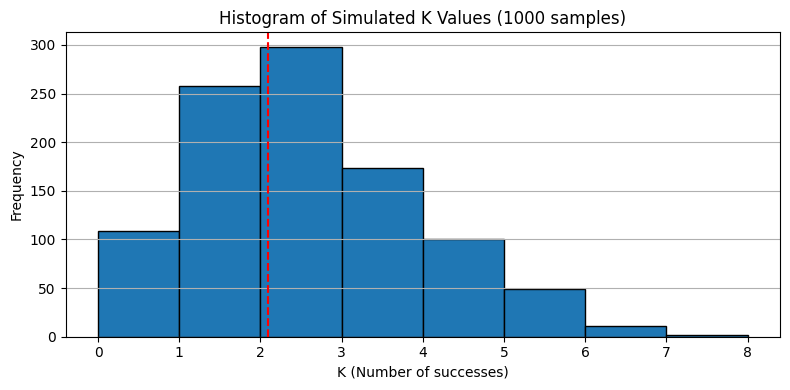

 K Val  Freq
     0   109
     1   258
     2   298
     3   173
     4   100
     5    49
     6    11
     7     2


In [91]:
#C
import pandas as pd
#sim 1000 N~Poisson(20)
N = rng.poisson(lam=20, size=1000)
p = 0.1

#Sim K ~ Binomial(N, 0.1)
K = rng.binomial(N, p)


#Define frequencies:
k_count = pd.Series(K).value_counts().sort_index()
k_freq = k_count.reset_index()
k_freq.columns = ['K Val', "Freq"]


# Step 4: Plot histogram
print(np.mean(K))
plt.figure(figsize=(8, 4))
plt.hist(K, bins=range(min(K), max(K)+2), edgecolor='black')
plt.axvline(np.mean(K), color='red', linestyle='--')
plt.title("Histogram of Simulated K Values (1000 samples)")
plt.xlabel("K (Number of successes)")
plt.ylabel("Frequency")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Step 5: Print frequency table
print(k_freq.to_string(index=False))




## 2. Tulips

You are working with a tulip farmer to improve the color of a new variety of blue tulip.
After many measurements, in which you've summarized the color of each tulip flower by a single wavelength,
you've determined that
- color values range from about 450-500nm (possibly with occasional tulips outside this range)
- the average tulip color is fairly blue: about 475nm
- the standard deviation of color across flowers from a single plant tends to be around 5nm
- however, some tulip plants produce more variable colors than others: most plants have standard deviations below 10nm,
  but some (roughly 10%) have larger standard deviations.

**(a)** Develop a model for $C$, the color value (measured as wavelengths, in nm) of a randomly chosen tulip in the field,
using at least two different distributions, formulated as in the last question.
Make sure all parameters are specified, and explain your choice of distributions.

**(b)** Simulate 100 tulip colors, and verify that the resulting values agree with the verbal description above.
You do not have to explicitly simulate the separate plants (i.e., you may assume that each flower comes from a separate plant).


a. My model has 2 different components, and is distributes the sample normally. 

- With 90% prob, tulip from a "norm" plant -> low var group

- With 10% prob, a tulip comes from a var plant -> high var group.

Model both groups using Normal Dist centered around 475: 5 is the typical sd, while 12 is the elevated sd

- Normal: C1 ~ N(mean=475, sd=5, sample=100)

- Var: C2 ~ N( C1, sd=10, samp=100)

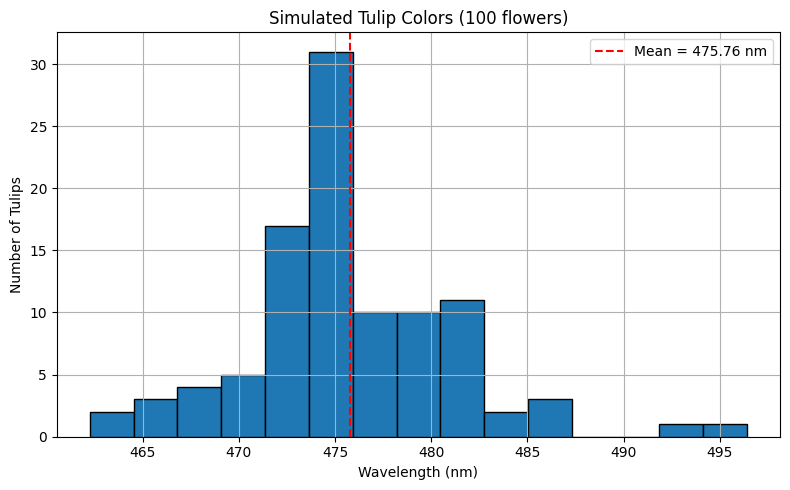

In [ ]:
#b
# Total number of tulips
n = 100
# Probability of variable plant (10%)
p_variable = 0.1

# Decide plant type for each tulip based on 10% rate given
is_variable = rng.random(n) < p_variable

# Simulate colors using 2 different dist w/ different sd
colors = np.where(
    is_variable,
    np.random.normal(475, 10, size=n),
    np.random.normal(475, 5, size=n)
)


plt.figure(figsize=(8, 5))
plt.hist(colors, bins=15, edgecolor='black')
plt.axvline(np.mean(colors), color='red', linestyle='--', label=f"Mean = {np.mean(colors):.2f} nm")
plt.title("Simulated Tulip Colors (100 flowers)")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Number of Tulips")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Your stochastic day

Give examples from your day of quantities that might be reasonably modeled as random draws from the following distributions:

**(a)** Binomial
**(b)** Normal
**(c)** Poisson
**(d)** Exponential

In each case, give example parameter values (i.e., for (a), say what $n$ and $p$ are in your example).

*Example:* Every day I tie my shoes twice. Each time, there is a probability of about 5% that I'll need to untie them to adjust.
The number of times I don't tie a shoe correctly on the first time in a day is Binomial($n=4$, $p=0.05$). (It is $n=4$ for two shoes, two times.)

*Example:* My eight-year-old-kid sometimes takes a loooong time to put on *her* shoes (indeed, seemingly unboundedly long), but is more often quick.
The time she takes to put on her shoes in the morning is perhaps Exponential with a mean of 2 minutes.

###a. (Binomial)
The number of times I get a heads when I flip a coin 10 times.
This follows a Binomial distribution because there are a fixed number of trials (10 flips), and each flip has only two possible outcomes: heads or tails.

###b. (Normal)
The time it takes me to brush my teeth each morning.
It usually takes around the same amount of time (like 2 minutes), but small differences day to day (more toothpaste, spacing out, etc.) cause small random variation, which is well modeled by a Normal distribution.

###c. (Poisson)
The number of text messages I receive in an hour.
This follows a Poisson distribution because messages come in at random times, independently of each other, and the average number per hour stays roughly consistent.

###d. (Exponential)
The time I wait between two incoming text messages.
This follows an Exponential distribution because it models the time between random, independent events that happen at a constant average rate — like messages arriving.


## 4. Integrals

Suppose that the amount of time it takes me to write a page of text is $R$ minutes,
and I will make $X$ errors during that time.
Suppose that $R$ is [Gamma distributed](https://en.wikipedia.org/wiki/Gamma_distribution) with shape $\alpha=5$ and scale $\theta=4$.
Also, I make more errors the longer I type: the number of errors is Poisson, with mean $R/5$.
In symbols:
$$\begin{aligned}
\text{total time: } R &\sim \text{Gamma}(\text{scale}=4, \text{shape}=5) \\
\text{number of errors: } X &\sim \text{Poisson}(\text{mean}=R/5) .
\end{aligned}$$

**(a)** Suppose that for a given page I took $r$ minutes (i.e., I had $R=r$).
What is the probability that I made no errors? Write down the expression, and evaluate it for $r=20$.

**(b)** Now, what is the probability I made no errors on a randomly chosen page?
To do this, write down the integral which averages your expression for (a) over possible values of $R$.

**(c)** Now use software (for instance, [`np.trapezoid()`](https://numpy.org/devdocs/reference/generated/numpy.trapezoid.html), or some symbolic algebra software that can "do" integrals) to find a value for the integral. *Note: you could use [`scipy.stats.gamma.pdf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html) for the probability density function of the Gamma distribution.*

**(d)** Check your answer to (b) by simulating at least 10000 draws from the distribution.

###a.
Asking $P(X = 0 | R = 20)$

Poisson probability mass function:
= $P(X = k ) = \Large\frac{e^{-\lambda}\lambda^k}{k!}$

Plug in $k = 0, \lambda = 4$:

$ e^{-4} \approx 0.0183$

###b.
To find the probability no erros were made on a random chosen page, average all possible probabilites and integrate over all possible values of R. Since R does not have a uniform dist. we weight the avg by the likehood each r value is. R values are continuous, so we weight the prob density function of the gamma dist:
Use law of total probaility:

$P(X = 0 | R = r) = \int_0^\infty P(X = 0 | R = r)* f_R(r)dr$

Plug in and eval: $f_R(r) =$ GAMMA PDF with shape $\alpha = 5,  \theta = 4.$

$P(X = 0) = \Large\int_0^\infty e^\frac{-r}{5} * \Large\frac{1}{\Gamma(5)*4^5} * r^4 * e^\frac{-r}{4} dr$ \

Simplify & we see that it is another Gamma Integral:

$P(X = 0) = \Large\int_o^\infty \Large\frac{1}{\Gamma(5) * 4^5} * r^4 * e^{-r* \frac{9}{20}}dr$



Estimated probability of making no errors: 0.0529
Numerical integration error estimate: 3.79e-11


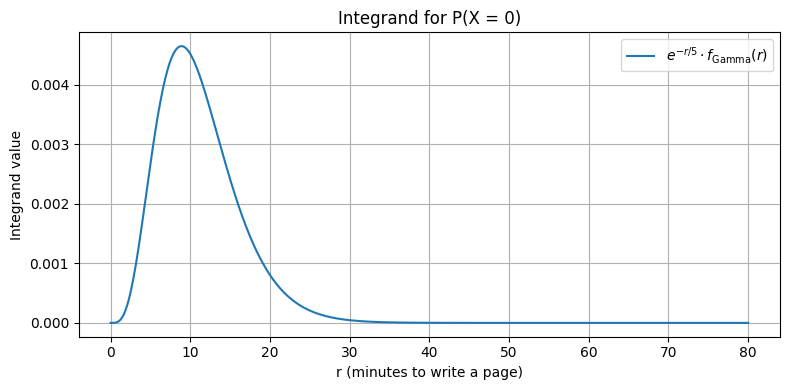

In [96]:
#c
from scipy.stats import gamma
from scipy.integrate import quad

# Define the integrand: e^(-r/5) * Gamma PDF with shape=5, scale=4
def integrand(r):
    return np.exp(-r / 5) * gamma.pdf(r, a=5, scale=4)

# Evaluate the integral from 0 to infinity
prob_no_errors, error_estimate = quad(integrand, 0, np.inf)

# Print the result
print(f"Estimated probability of making no errors: {prob_no_errors:.4f}")
print(f"Numerical integration error estimate: {error_estimate:.2e}")


"""For Visualization"""
# Define range of r values
r_vals = np.linspace(0, 80, 500)

# Define the integrand: e^(-r/5) * Gamma PDF
integrand_vals = np.exp(-r_vals / 5) * gamma.pdf(r_vals, a=5, scale=4)

# Plot the integrand
plt.figure(figsize=(8, 4))
plt.plot(r_vals, integrand_vals, label=r'$e^{-r/5} \cdot f_{\mathrm{Gamma}}(r)$')
plt.title("Integrand for P(X = 0)")
plt.xlabel("r (minutes to write a page)")
plt.ylabel("Integrand value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Est P(X = 0) from sim : 0.0523


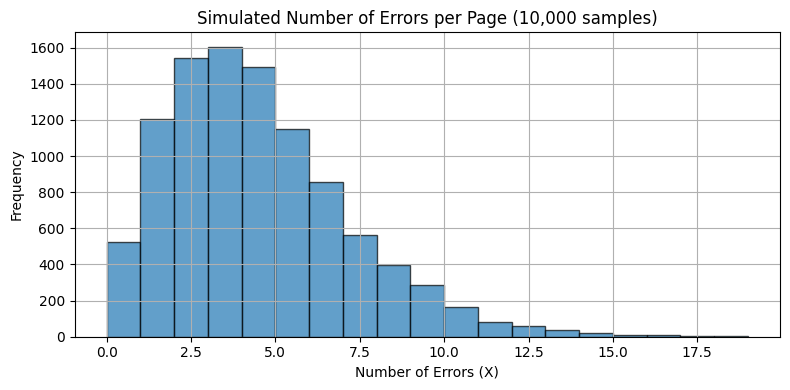

In [97]:
#d

#Given sim size
n = 10000
#First sim R ~ Gamme(shape =5, sacle = 4)
r_samp = rng.gamma(shape=5, scale=4, size=n)
#Next for each R, sim X ~ Poisson(lambda = R/5)
x_samp = rng.poisson(lam=(r_samp / 5))
#Decide the # of errors with bool oper == 0
prob_no_errors = np.mean(x_samp == 0)

print(f"Est P(X = 0) from sim : {prob_no_errors:.4f}")


# Plot histogram of simulated error counts(SIMPLY FOR VISUALIZATION)
plt.figure(figsize=(8, 4))
plt.hist(x_samp, bins=range(0, 20), edgecolor='black', alpha=0.7)
plt.title("Simulated Number of Errors per Page (10,000 samples)")
plt.xlabel("Number of Errors (X)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()
